# Deutsch-Jozsa analysis

***

In [1]:
# Qiskit itself.
import qiskit
# Aer provider, simulator.
import qiskit.providers.aer as aer

In [2]:
# Plotting.
import matplotlib.pyplot as plt
# Change the style.
plt.style.use('ggplot')

In [3]:
# Apply U_f to circuit.
def U_f(circuit):
    """Add gates for U_F to circuit."""
    # Number of qubits in circuit.
    circuit.num_qubits
    # Apply identity to third qubit.
    circuit.x(k-1)

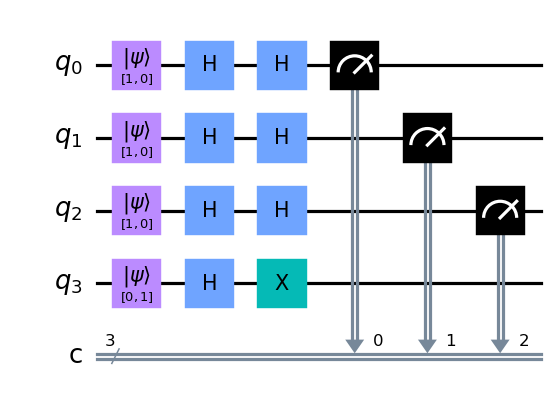

In [4]:
# Number of qubits in total.
k = 4

# Create a circuit with k qubits and k-1 classical bits.
circuit = qiskit.QuantumCircuit(k, k-1)

# Initialize all but last qubit to 0.
for i in range(k-1):
    circuit.initialize([1, 0], i)
# Initialize last qubit to 1.
circuit.initialize([0, 1], k-1)

# Apply Hadamard gate to all qubits.
circuit.h(range(k))

# Apply U_f.
U_f(circuit)

# Apply Hadamard to qubits 0 and 1.
circuit.h(range(k-1))

# Measure all but last qubit.
for i in range(k-1):
    circuit.measure(i, i)

# Draw the circuit.
circuit.draw(output='mpl', scale=1.6)

{'000': 1000}


/Users/ian/miniforge3/lib/python3.9/site-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/ian/miniforge3/lib/python3.9/site-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


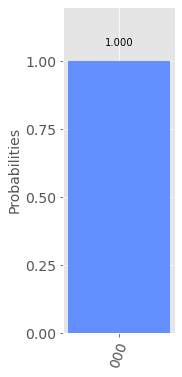

In [5]:
# Create simulation.
simulator = aer.QasmSimulator()

# Compile the circuit for the simulator.
compiled_circuit = qiskit.transpile(circuit, simulator)

# Run the simulated circuit 1000 times.
job = simulator.run(compiled_circuit, shots=1000)

# Get the 1000 results.
result = job.result()

# Get the counts.
counts = result.get_counts(circuit)

# Print the counts.
print(counts)

# Plot histogram of counts.
qiskit.visualization.plot_histogram(counts, figsize=(2,6))